In [1]:
# Supervised Learning - Foundations: ReCell
# Marks: 60

In [2]:
# Buying and selling used phones and tablets used to be something that happened on a 
#handful of online marketplace sites. But the used and refurbished device market has grown 
#considerably over the past decade, and a new IDC (International Data Corporation) forecast
#predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual 
#growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick 
#in demand for used phones and tablets that offer considerable savings compared with new 
#models.

# Refurbished and used devices continue to provide cost-effective alternatives to both 
#consumers and businesses that are looking to save money when purchasing one. There are 
#plenty of other benefits associated with the used device market. Used and refurbished 
#devices can be sold with warranties and can also be insured with proof of purchase. 
#Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to 
#customers for refurbished devices. Maximizing the longevity of devices through second-hand
#trade also reduces their environmental impact and helps in recycling and reducing waste. 
#The impact of the COVID-19 outbreak may further boost this segment as consumers cut back 
#on discretionary spending and buy phones and tablets only for immediate needs.

In [3]:
# Objective

In [4]:
# The rising potential of this comparatively under-the-radar market fuels the need for an 
#ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. 
#ReCell, a startup aiming to tap the potential in this market, has hired you as a data 
#scientist. They want you to analyze the data provided and build a linear regression model 
#to predict the price of a used phone/tablet and identify factors that significantly 
#influence it.

In [5]:
# Data Description

In [6]:
# The data contains the different attributes of used/refurbished phones and tablets. The 
#detailed data dictionary is given below.

In [7]:
# Data Dictionary

In [8]:
# brand_name: Name of manufacturing brand
# os: OS on which the device runs
# screen_size: Size of the screen in cm
# 4g: Whether 4G is available or not
# 5g: Whether 5G is available or not
# main_camera_mp: Resolution of the rear camera in megapixels
# selfie_camera_mp: Resolution of the front camera in megapixels
# int_memory: Amount of internal memory (ROM) in GB
# ram: Amount of RAM in GB
# battery: Energy capacity of the device battery in mAh
# weight: Weight of the device in grams
# release_year: Year when the device model was released
# days_used: Number of days the used/refurbished device has been used
# new_price: Price of a new device of the same model in euros
# used_price: Price of the used/refurbished device in euros

In [9]:
# Importing necessary libraries and data

In [3]:
# 1. Loading libraries

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [11]:
# Loading the data

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("used_device_data.csv")
df1 = df.copy()  # Copy the data

<IPython.core.display.Javascript object>

In [13]:
print(f"There are {df1.shape[0]} rows and {df1.shape[1]} columns.")  # f-string

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [14]:
# Data Overview and Sanity Checks

<IPython.core.display.Javascript object>

In [15]:
# let's view a sample of the data
df1.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1207,HTC,Android,12.70,no,no,8.0,5.0,32.0,4.0,2100.0,160.00,2014,1044,190.05,70.70
143,Samsung,Android,20.32,yes,no,5.0,2.0,16.0,1.5,4200.0,313.00,2015,909,210.23,75.65
3202,Huawei,Android,16.69,yes,yes,10.5,16.0,128.0,8.0,4000.0,178.00,2020,221,469.87,128.57
1127,Honor,Android,10.29,no,no,8.0,2.0,32.0,4.0,1730.0,159.00,2015,894,69.98,48.57
2926,Xiaomi,Android,14.83,yes,no,13.0,8.0,64.0,4.0,3000.0,150.00,2018,446,169.30,105.80
1726,LG,Android,7.67,no,no,2.0,1.3,16.0,4.0,1540.0,140.45,2014,952,61.35,29.49
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.00,2019,316,99.70,95.13
3273,Sony,Android,15.37,yes,yes,NaN,8.0,256.0,8.0,4000.0,181.40,2020,236,934.15,240.67
1411,Others,Others,19.94,no,no,5.0,2.0,32.0,4.0,4450.0,384.00,2014,767,170.81,78.89
551,Alcatel,Android,10.29,no,no,5.0,0.3,16.0,4.0,1800.0,157.00,2013,921,99.85,51.29


<IPython.core.display.Javascript object>

In [17]:
# Observations
# .The 4g and 5g columns are binomials, while there are missing values in
# the main_camera_mp column indicating that it will require possble
# treatment for modelling.
# .The used_price column varies from 51.9 to 128.57 euros.

<IPython.core.display.Javascript object>

In [20]:
# checking column datatypes and number of non-null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

In [21]:
# Observations
# .Most of the columns in the data are numeric in nature (integer or
# float).
# . brand_name, os, 4g and 5g are of object type meaning they are text
# values.
# .Country and Status columns are of object type, which means they have
# text values.
# .Some columns seem to have null (or missing) values too:
# (main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight)

<IPython.core.display.Javascript object>

In [22]:
# checking for duplicate values in the data
df1.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [23]:
# There is no duplicate in the data.

<IPython.core.display.Javascript object>

In [27]:
# Checking for missing values in the data
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [25]:
# Observation:
# .There are missing values in the main_camera_mp, selfie_camera_mp,
# int_memory, ram, battery, weight columns.

<IPython.core.display.Javascript object>

In [26]:
# Let's look at the statistical summary of the data
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

In [28]:
# Observations
# .There are 34 unique values for brand_name and 4 unique values for
# the operating system (os).
# .The price for the used/refurbished device varies from 4.65 to 749.52
# euros, with a mean value of 92.3 euros.
# The weight of the device range from 69.0g to 855g

<IPython.core.display.Javascript object>

In [29]:
# Exploratory Data Analysis (EDA)

<IPython.core.display.Javascript object>

In [30]:
## 1. What does the distribution of used device prices look like?

<IPython.core.display.Javascript object>

In [31]:
# statistical summary of used_price
df1.used_price.describe()

count    3454.000000
mean       92.302936
std        54.701648
min         4.650000
25%        56.482500
50%        81.870000
75%       116.245000
max       749.520000
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [32]:
# value counts of usedPrice
df1.used_price.value_counts()

58.32     4
86.76     4
68.84     4
34.30     4
95.23     3
         ..
44.06     1
74.12     1
107.89    1
124.50    1
89.48     1
Name: used_price, Length: 3094, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='used_price'>

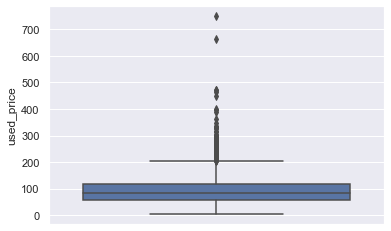

<IPython.core.display.Javascript object>

In [33]:
# Determining the distribution of used_price
sns.boxplot(data=df1, y="used_price")

<AxesSubplot:xlabel='used_price', ylabel='Count'>

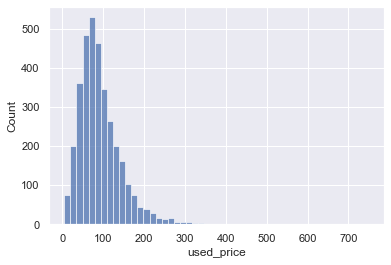

<IPython.core.display.Javascript object>

In [34]:
sns.histplot(data=df1["used_price"], bins=50, palette="winter")

In [36]:
# The plots above for used_price show that it is right skewed with some
# potential outlier, meaning it might required some form of a treatment
# prior to modelling.

<IPython.core.display.Javascript object>

In [37]:
### 2.What percentage of the used device market is dominated by Android
# devices?

<IPython.core.display.Javascript object>

In [7]:
df1.groupby("os")["used_price"].sum()

os
Android    302838.07
Others       5244.64
Windows      4847.70
iOS          5883.93
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [42]:
P = df1.groupby("os")["used_price"].count().reset_index()
P["Percentage"] = 100 * P["used_price"] / P["used_price"].sum()
P["Percentage"]

0    93.051534
1     3.966416
2     1.939780
3     1.042270
Name: Percentage, dtype: float64

<IPython.core.display.Javascript object>

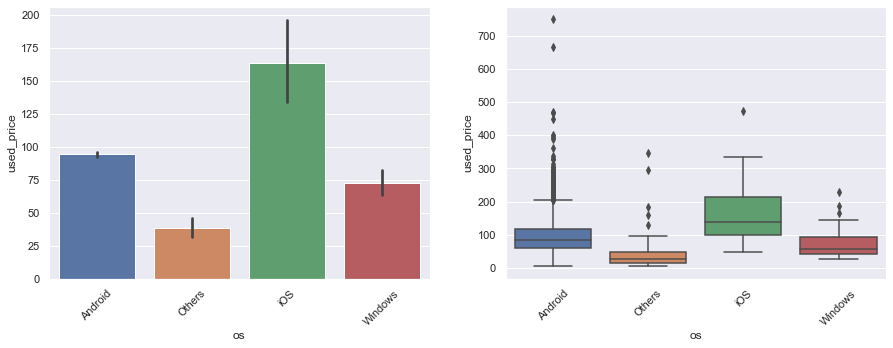

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df1, y="used_price", x="os")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, y="used_price", x="os")
plt.xticks(rotation=45)

plt.show()

In [45]:
# Observation:
# 93.1% of the used device market is dominated by Android devices.

<IPython.core.display.Javascript object>

In [50]:
# 3.The amount of RAM is important for the smooth functioning of a
# device. How does the amount of RAM vary with the brand?

<IPython.core.display.Javascript object>

In [53]:
df1.groupby("brand_name")["ram"].mean().sort_values(ascending=False)

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.655378
Honor         4.603448
Xiaomi        4.583333
Google        4.533333
Meizu         4.451613
Samsung       4.199413
Realme        4.195122
Sony          4.069767
Asus          4.049180
ZTE           4.023214
HTC           4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Panasonic     4.000000
Coolpad       3.954545
Motorola      3.943396
LG            3.936567
Gionee        3.933036
Acer          3.901961
Lenovo        3.885965
BlackBerry    3.829545
Others        3.777888
Spice         3.750000
Micromax      3.679487
Alcatel       3.407025
Karbonn       3.353448
Lava          3.277778
Infinix       2.600000
Nokia         2.420294
Celkon        1.613636
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

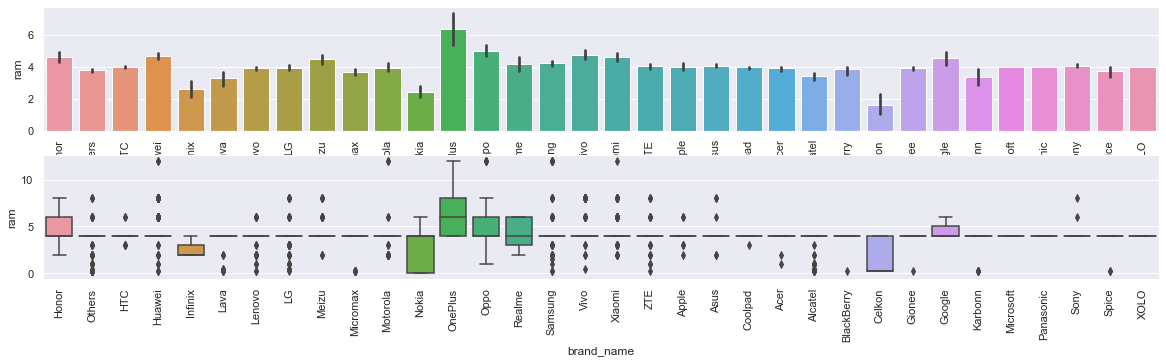

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(20, 5))

plt.subplot(2, 1, 1)
sns.barplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

In [54]:
# Observations:
# OnePlus provides the highest amount of RAM on an average for the
# device followed by oppo, Vivo, Huawei etc while Celkon provides the
# least.

<IPython.core.display.Javascript object>

In [57]:
## 4.A large battery often increases a device's weight, making it feel
# uncomfortable in the hands. How does the weight vary for phones and
# tablets offering large batteries (more than 4500 mAh)?

<IPython.core.display.Javascript object>

In [56]:
df1.battery.value_counts()

4000.0    341
3000.0    314
2000.0    244
2500.0    137
2100.0    121
         ... 
3110.0      1
2480.0      1
3330.0      1
8134.0      1
7400.0      1
Name: battery, Length: 324, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
df1["battery"].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

<IPython.core.display.Javascript object>

In [59]:
bat_highcap = df1[df1.battery > 4500]
bat_highcap.weight.value_counts()

195.0    11
199.0     9
185.0     9
460.0     7
310.0     7
208.0     7
210.0     6
498.0     6
469.0     6
450.0     5
197.0     5
209.0     5
510.0     5
305.0     5
218.0     5
190.0     5
188.0     5
198.0     4
360.0     4
490.0     4
173.0     4
215.0     4
331.0     3
338.0     3
487.0     3
193.0     3
175.0     3
495.0     3
525.0     3
190.5     3
200.0     3
203.0     3
239.0     3
180.0     3
340.0     3
290.0     3
189.0     3
181.0     3
320.0     3
520.0     2
465.0     2
350.0     2
509.0     2
753.0     2
211.0     2
655.0     2
550.0     2
468.0     2
390.0     2
202.0     2
480.0     2
439.0     2
205.0     2
222.0     2
453.6     2
147.5     2
467.0     2
620.0     2
299.0     2
168.0     2
420.0     2
580.0     2
500.0     2
201.0     2
213.0     2
475.0     2
335.0     2
437.0     2
220.0     2
204.1     2
186.0     1
233.0     1
356.0     1
605.0     1
219.0     1
470.0     1
180.3     1
204.0     1
389.0     1
540.0     1
342.5     1
626.0     1
732.0     1
612.

<IPython.core.display.Javascript object>

In [60]:
bat_highcap["weight"].describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

In [61]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

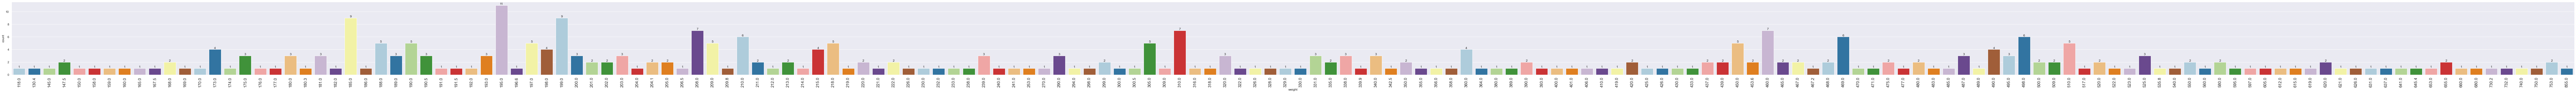

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(bat_highcap, "weight")

In [65]:
# Observations
# Tablets and phones offering large batteries of more than 4500 mAh are
# mostly seen with the weight of 195.0g followed by 199.0g, 185.0g etc

<IPython.core.display.Javascript object>

In [66]:
# 5.Bigger screens are desirable for entertainment purposes as they
# offer a better viewing experience. How many phones and tablets are
# available across different brands with a screen size larger than 6
# inches

<IPython.core.display.Javascript object>

In [67]:
df1.screen_size.value_counts()

12.70    575
12.83    409
10.29    219
10.16    188
15.24    129
12.75    117
17.78    113
12.88    112
10.34    110
20.32     90
25.43     77
15.32     69
15.34     67
7.75      65
15.29     65
15.37     64
16.23     50
10.24     49
5.18      49
16.59     38
15.27     37
15.90     32
13.84     27
12.78     27
16.69     25
5.28      25
15.21     25
12.73     23
15.80     20
15.42     20
16.94     20
16.74     19
10.36     18
15.39     18
14.50     18
15.47     17
15.77     17
7.62      16
23.04     15
12.93     15
18.01     15
16.36     14
15.44     13
20.42     11
16.43     11
12.90     11
25.53     10
16.64     10
16.28      8
25.60      8
7.67       8
16.21      7
12.85      7
14.83      7
16.33      6
5.08       6
15.95      6
5.23       6
30.53      6
10.31      5
5.13       5
16.13      5
7.82       5
13.08      5
16.56      5
23.01      5
11.81      5
16.89      5
14.35      5
25.50      5
30.71      4
13.87      4
16.71      4
15.62      4
16.81      4
17.30      4
19.94      4

<IPython.core.display.Javascript object>

In [68]:
df1["screen_size"].describe()

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64

<IPython.core.display.Javascript object>

In [69]:
df_highscrsize = df1[df1.screen_size > 6]
df_highscrsize.brand_name.value_counts()

Others        479
Samsung       334
Huawei        251
LG            197
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Vivo          117
Honor         116
Alcatel       115
HTC           110
Micromax      108
Motorola      106
Sony           86
Nokia          72
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Spice          30
Karbonn        29
Celkon         25
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     21
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

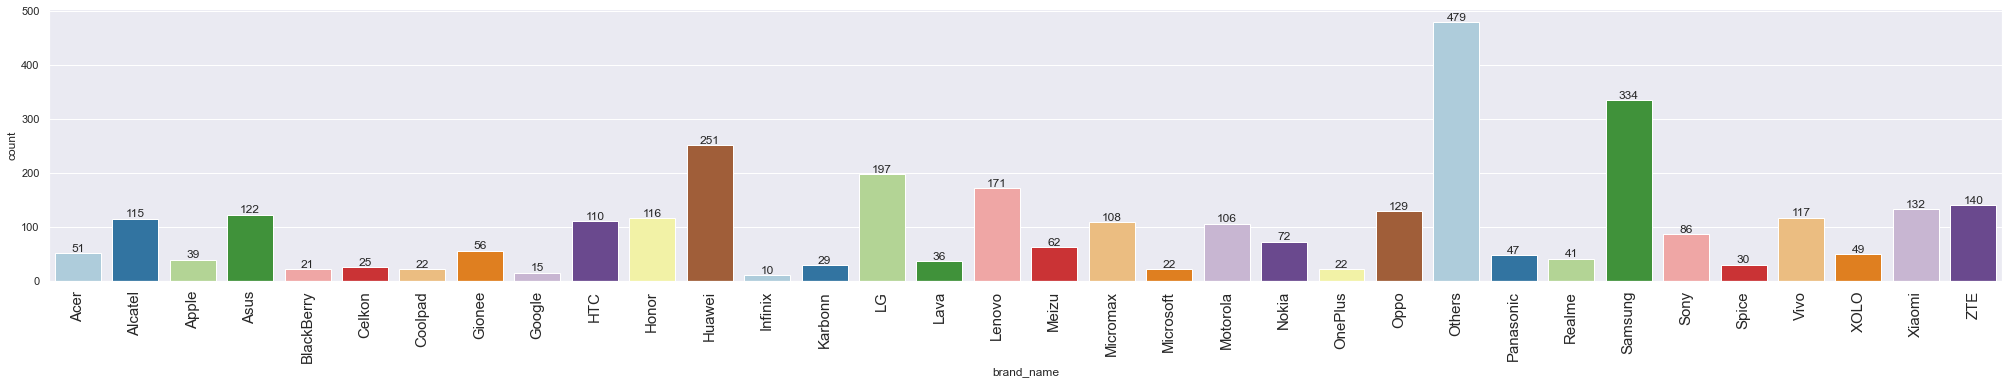

<IPython.core.display.Javascript object>

In [70]:
labeled_barplot(df_highscrsize, "brand_name")

In [72]:
# Observations
# Samsung and Huawei provide the highest number of phones with size
# larger than 6 inches while Google and Infinix provide the least.

<IPython.core.display.Javascript object>

In [73]:
# 6.Budget devices nowadays offer great selfie cameras, allowing us to
# capture our favorite moments with loved ones. What is the distribution
# of budget devices offering greater than 8MP selfie cameras across
# brands?

<IPython.core.display.Javascript object>

In [74]:
df1.selfie_camera_mp.value_counts()

5.00     791
8.00     549
2.00     538
0.30     492
16.00    298
1.30     148
32.00     94
13.00     90
20.00     67
1.20      43
0.00      39
2.10      37
1.00      34
1.60      31
24.00     30
25.00     28
7.00      21
12.00     21
4.00      20
1.90      12
2.20      11
10.00     10
5.10       9
3.00       7
1.10       5
14.50      5
9.00       4
3.70       3
14.00      3
1.25       2
0.65       2
18.00      2
10.50      2
0.90       1
3.50       1
16.30      1
1.80       1
Name: selfie_camera_mp, dtype: int64

<IPython.core.display.Javascript object>

In [75]:
df1.selfie_camera_mp.describe()

count    3452.000000
mean        6.554229
std         6.970372
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

In [82]:
df_highselfie = df1[df1.selfie_camera_mp > 8]
df_highselfie.brand_name.value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Gionee         4
Infinix        4
Coolpad        3
Micromax       2
BlackBerry     2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

In [96]:
df_budget = (
    df_highselfie.groupby("brand_name")["used_price"]
    .value_counts()
    .sort_values(ascending=False)
)
df_budget

brand_name  used_price
Acer        78.91         1
Samsung     143.65        1
            109.32        1
            111.53        1
            113.80        1
                         ..
Meizu       108.76        1
            112.29        1
            113.05        1
            115.50        1
ZTE         289.47        1
Name: used_price, Length: 655, dtype: int64

<IPython.core.display.Javascript object>

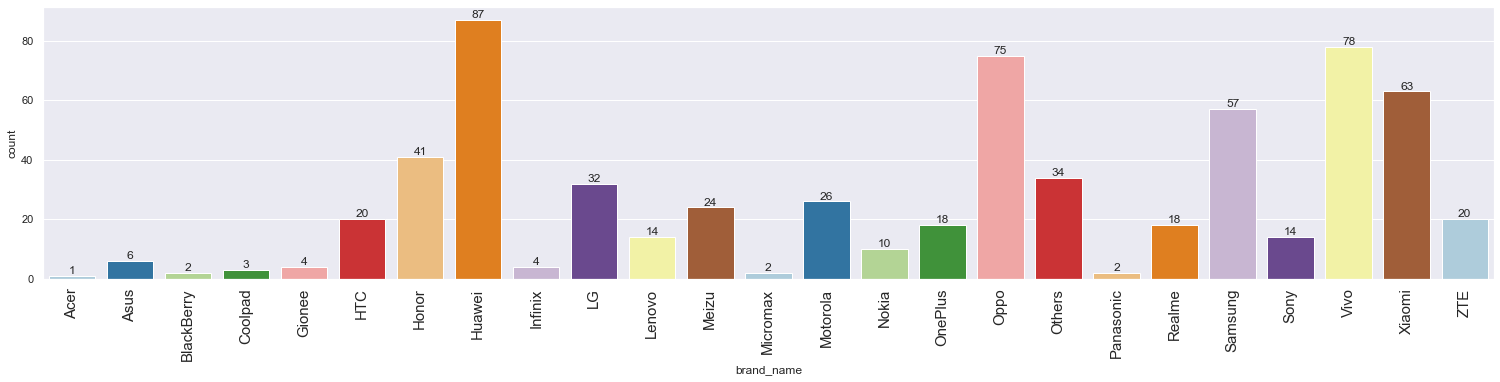

<IPython.core.display.Javascript object>

In [103]:
labeled_barplot(df_highselfie, "brand_name")

In [102]:
# Observations
# Acer provide the best used_price value for budget devices  offering
# greater than 8MP selfie cameras across brands.

<IPython.core.display.Javascript object>

In [104]:
# 7. Which attributes are highly correlated with the price of a used
# device?

<IPython.core.display.Javascript object>

In [105]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_columns].corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.340895,0.529275
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.358298,0.459209
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.415596,0.614675
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.369145,0.378347
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.494293,0.529434
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.370490,0.549647
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.219115,0.357983
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.303571,0.494910
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.246353,-0.385777
new_price,0.340895,0.358298,0.415596,0.369145,0.494293,0.370490,0.219115,0.303571,-0.246353,1.000000,0.809335


<IPython.core.display.Javascript object>

In [341]:
# Observations
# .new_price  and selfie_camera_mp are highly positively correlated
# with used_price and used_price respectively.

<IPython.core.display.Javascript object>

In [107]:
# Data Preprocessing

<IPython.core.display.Javascript object>

In [108]:
# checking for missing values in the data.
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [109]:
# most rows don't have missing values now
num_missing = df1.isnull().sum(axis=1)
num_missing.value_counts()

0    3253
1     200
2       1
dtype: int64

<IPython.core.display.Javascript object>

In [110]:
# most rows don't have missing values now
num_missing = df1.isnull().sum(axis=1)
num_missing.value_counts()

0    3253
1     200
2       1
dtype: int64

<IPython.core.display.Javascript object>

In [111]:
# Investigating the missingness in the data

<IPython.core.display.Javascript object>

In [112]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df1[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   3
battery               5
weight                7
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
ram        1
battery    1
dtype: int64





<IPython.core.display.Javascript object>

In [113]:
# Overall, most of the missingness seems not to have a structure except
# some few variable

<IPython.core.display.Javascript object>

In [114]:
# Missing value treatment

<IPython.core.display.Javascript object>

In [115]:
# filling missing values using the column median for the predictor
# variables
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_columns] = df1[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [116]:
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

In [117]:
# Observation
# There is no missing value in the data

<IPython.core.display.Javascript object>

In [118]:
# let's check the summary of our data
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.384534,4.700148,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.553329,6.968453,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.546957,84.926611,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03608,1.364314,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3133.170961,1298.565062,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

In [119]:
# The count of the various variables are the same meaning they contain
# the same number of various (absent of non-null)

<IPython.core.display.Javascript object>

In [120]:
df1.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [121]:
# the data consists of 3454 rows and 15 columns

<IPython.core.display.Javascript object>

In [122]:
## EDA

<IPython.core.display.Javascript object>

In [123]:
# Let's visualize the data!

<IPython.core.display.Javascript object>

In [124]:
# Univariate Analysis

<IPython.core.display.Javascript object>

In [125]:
# Univariate Analysis

<IPython.core.display.Javascript object>

In [126]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

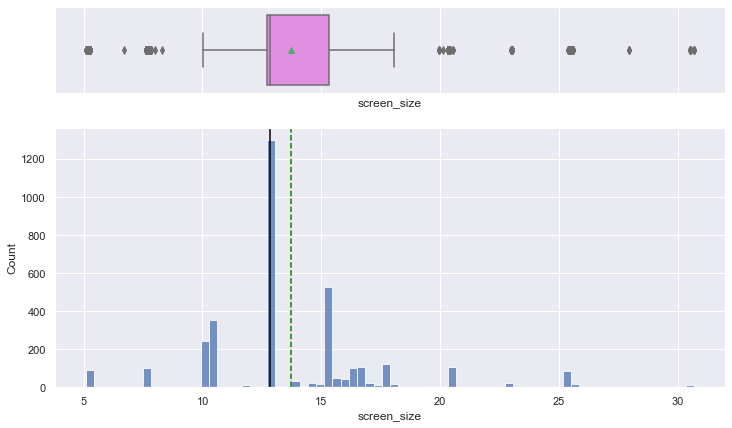

<IPython.core.display.Javascript object>

In [127]:
histogram_boxplot(df1, "screen_size")

In [128]:
# Observation
# The screen variable is right skewed, with potential outliers.

<IPython.core.display.Javascript object>

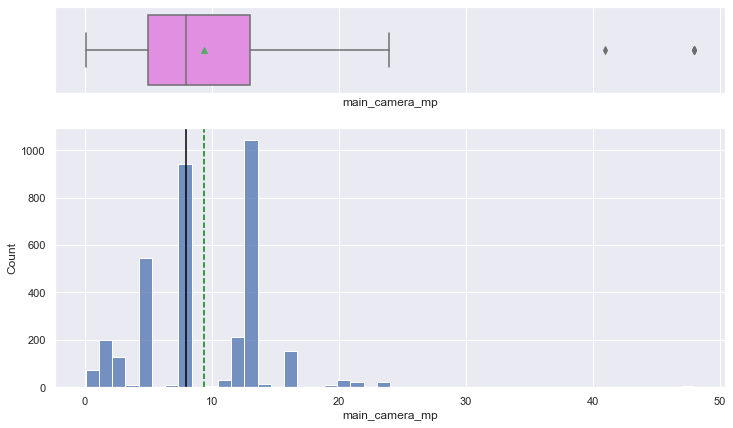

<IPython.core.display.Javascript object>

In [129]:
histogram_boxplot(df1, "main_camera_mp")

In [130]:
# Observation
# The main_camera_mp is also right skewed some potential outliers

<IPython.core.display.Javascript object>

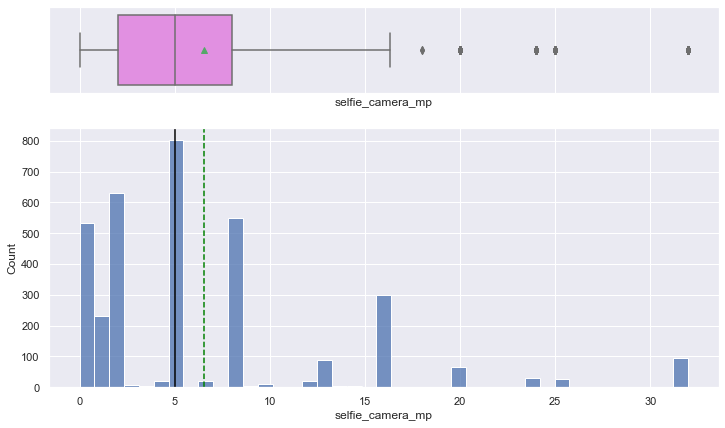

<IPython.core.display.Javascript object>

In [131]:
histogram_boxplot(df1, "selfie_camera_mp")

In [132]:
# Observation
# The selfie_camera_mp is right skewed with some potential outliers.

<IPython.core.display.Javascript object>

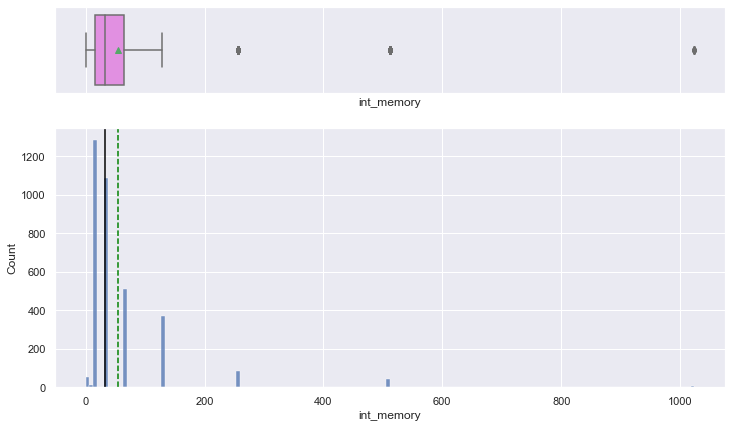

<IPython.core.display.Javascript object>

In [133]:
histogram_boxplot(df1, "int_memory")

In [134]:
# Observation
# int_memory is right skewed with some outiers

<IPython.core.display.Javascript object>

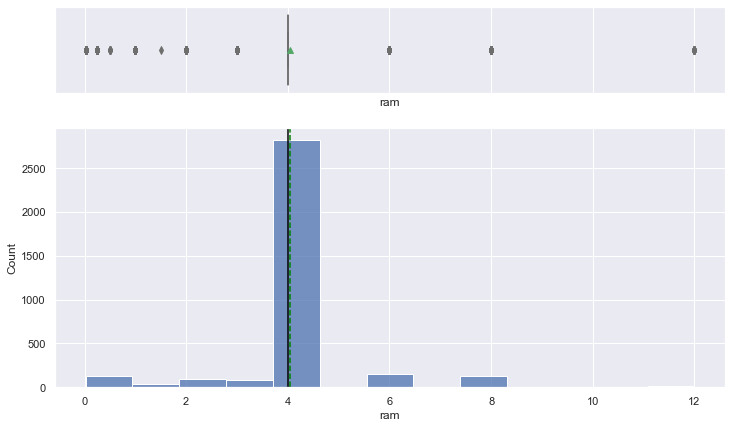

<IPython.core.display.Javascript object>

In [135]:
histogram_boxplot(df1, "ram")

In [137]:
# Observation
# Most of the values are found on the left side of the distribution.

<IPython.core.display.Javascript object>

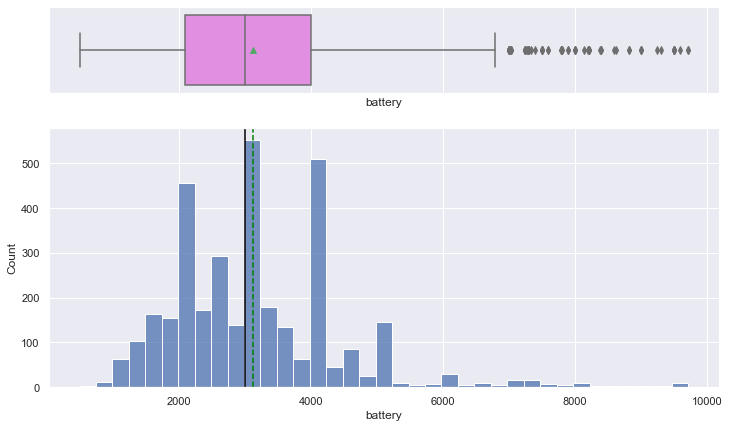

<IPython.core.display.Javascript object>

In [138]:
histogram_boxplot(df1, "battery")

In [139]:
# Observation
# .The battery is also right skewed with some potential outlier

<IPython.core.display.Javascript object>

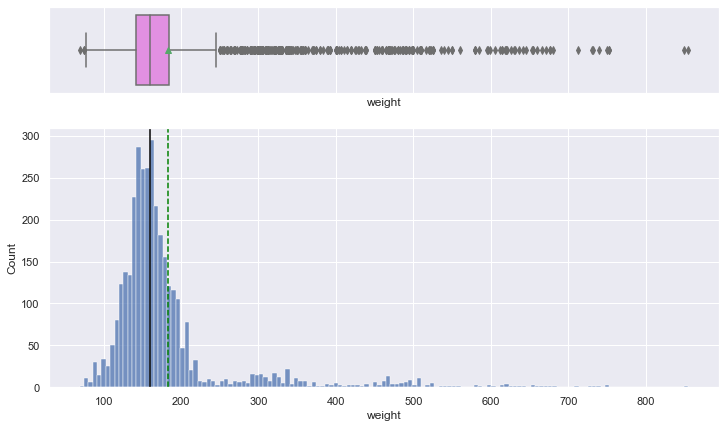

<IPython.core.display.Javascript object>

In [140]:
histogram_boxplot(df1, "weight")

In [348]:
# Observation.
# The weight distribution is highly right skewed with some ooutliers.
# Most of the data concentrated between 100 and 200g.

<IPython.core.display.Javascript object>

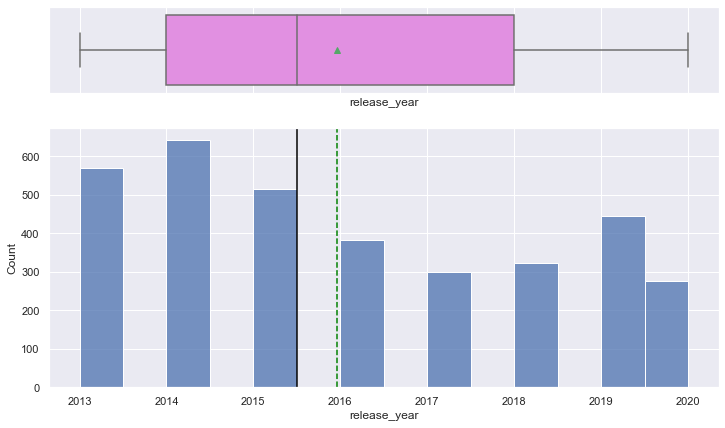

<IPython.core.display.Javascript object>

In [142]:
histogram_boxplot(df1, "release_year")

In [144]:
# Observations
# .Many devices were released in 2014 compared to other years.
# . The release_year distribution is slightly right skewed.

<IPython.core.display.Javascript object>

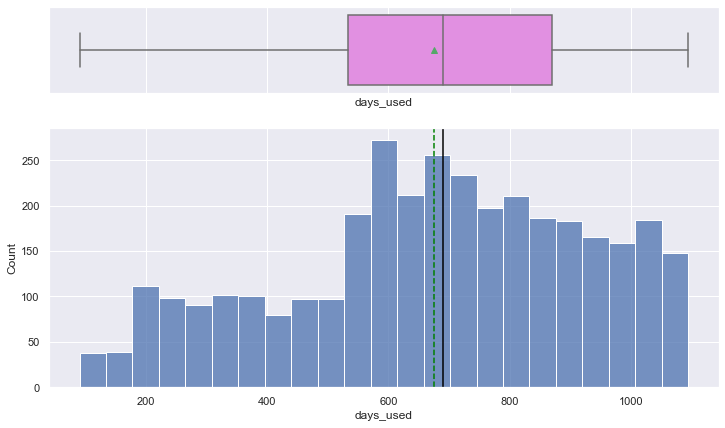

<IPython.core.display.Javascript object>

In [145]:
histogram_boxplot(df1, "days_used")

In [148]:
# Observations
# .majority of the devices were used for over 600 days
# .the distribution is slightly left skewed.

<IPython.core.display.Javascript object>

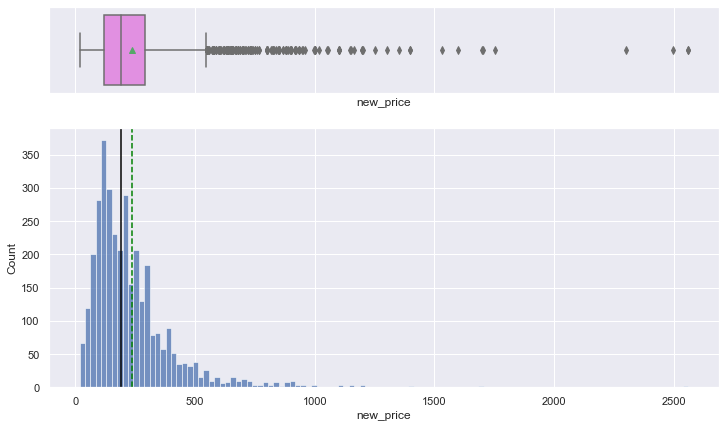

<IPython.core.display.Javascript object>

In [149]:
histogram_boxplot(df1, "new_price")

In [342]:
# Observation:
# The new_price distribution is very highly right skewed with some
# outliers. Most of the data is concentrated between 18.2 to 500 euros

<IPython.core.display.Javascript object>

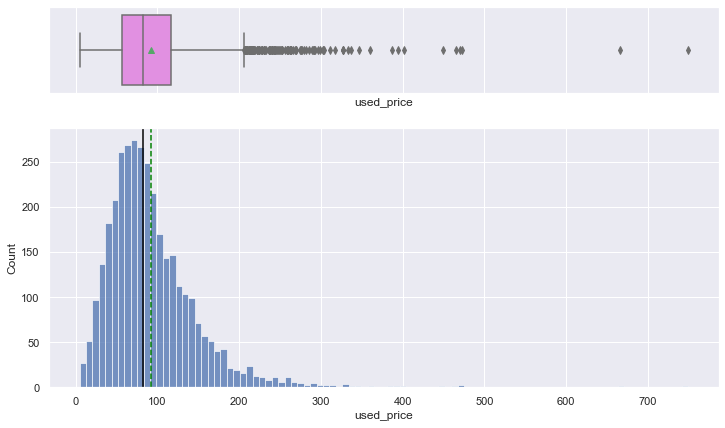

<IPython.core.display.Javascript object>

In [151]:
histogram_boxplot(df1, "used_price")

In [343]:
# Observation:
# The used_price distribution is right skewed with some outliers. majority
# of the data falls below 200 euros.

<IPython.core.display.Javascript object>

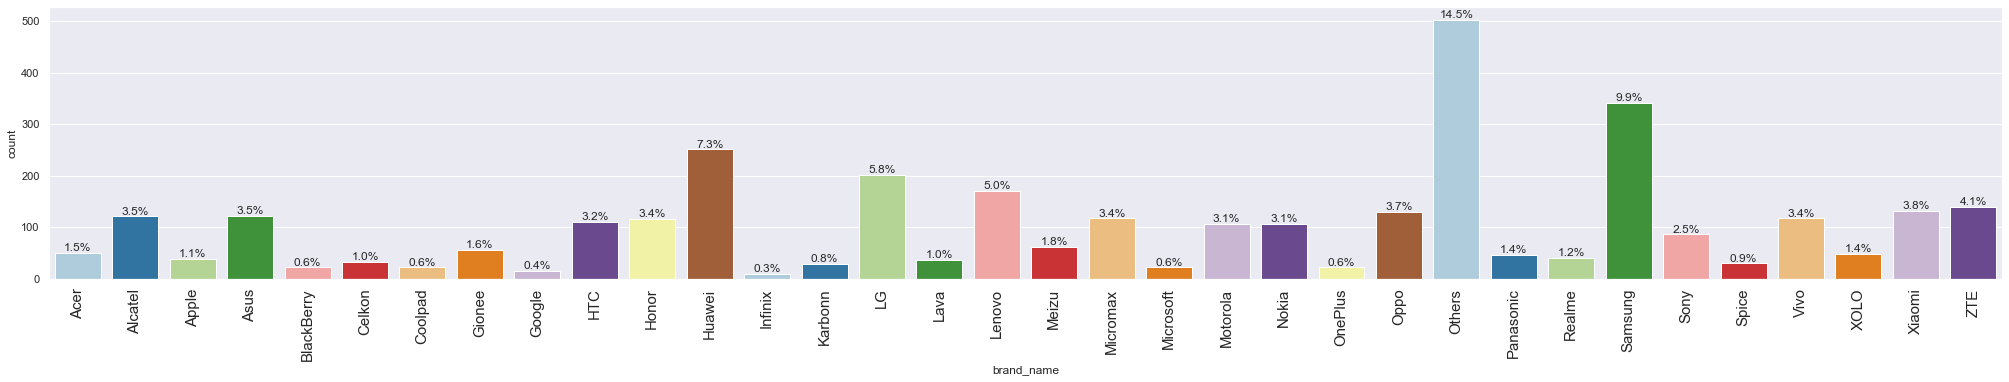

<IPython.core.display.Javascript object>

In [153]:
labeled_barplot(df1, "brand_name", perc=True)

In [156]:
# Observations
# Samsung is the most common brand among the  brand name.

<IPython.core.display.Javascript object>

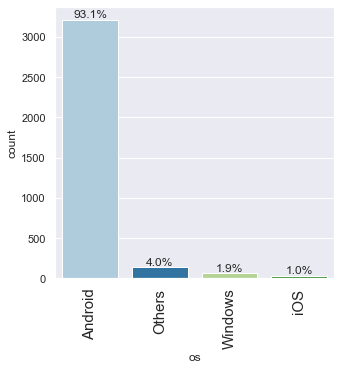

<IPython.core.display.Javascript object>

In [155]:
labeled_barplot(df1, "os", perc=True)

In [157]:
# Observation
# Android is the most common operating system

<IPython.core.display.Javascript object>

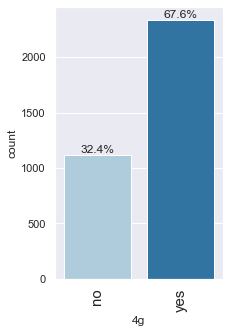

<IPython.core.display.Javascript object>

In [158]:
labeled_barplot(df1, "4g", perc=True)

In [159]:
# Observations
# Most of the device operated on the 4g.

<IPython.core.display.Javascript object>

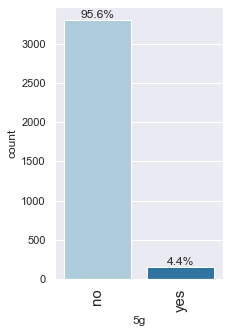

<IPython.core.display.Javascript object>

In [160]:
labeled_barplot(df1, "5g", perc=True)

In [162]:
# Observations
# Very few devices had 5g.

<IPython.core.display.Javascript object>

In [163]:
# Bivariate  and Multivariate analysis

<IPython.core.display.Javascript object>

In [164]:
# os vs used_price

<IPython.core.display.Javascript object>

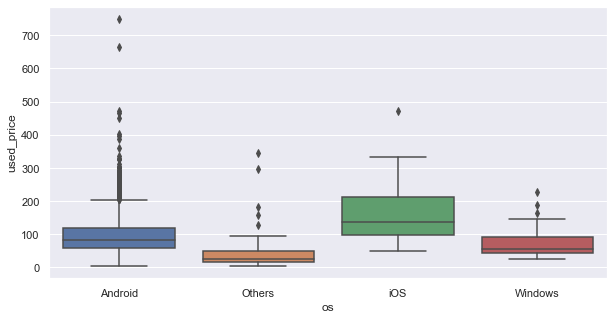

<IPython.core.display.Javascript object>

In [165]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="os", y="used_price", data=df1)
plt.show()

In [166]:
# Observation
# The iOS is the most expensive operating system amongst the used devices
# with a median value greater than 100 euros.

<IPython.core.display.Javascript object>

In [167]:
# 4g vs used_price

<IPython.core.display.Javascript object>

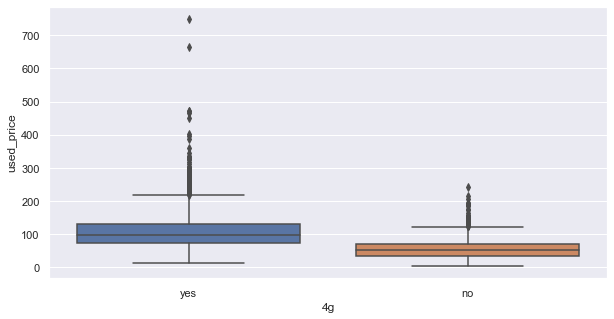

<IPython.core.display.Javascript object>

In [168]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="4g", y="used_price", data=df1)
plt.show()

In [169]:
# Observations
# Most of the used devices had 4g with a median price of appromately
# 100 euros.

<IPython.core.display.Javascript object>

In [170]:
# 5g vs used_price

<IPython.core.display.Javascript object>

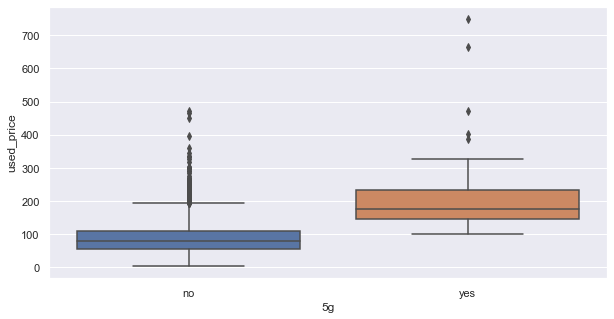

<IPython.core.display.Javascript object>

In [171]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="5g", y="used_price", data=df1)
plt.show()

In [346]:
# Observations
# Used device price with 5g are more expensive (median value of
# ~185 euros) than those without 5g.

<IPython.core.display.Javascript object>

In [173]:
# released year vs used_price

<IPython.core.display.Javascript object>

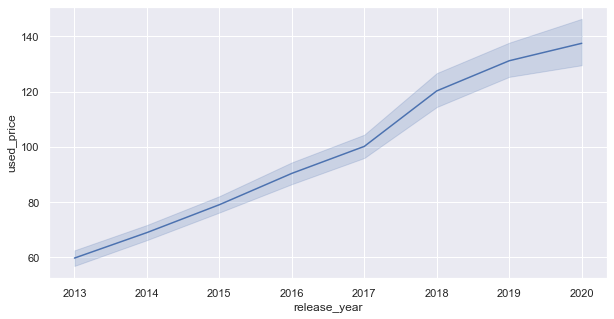

<IPython.core.display.Javascript object>

In [174]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="release_year", y="used_price", data=df1)
plt.show()

In [175]:
# Observations
# They has been a steady increase in the prices of used devices ranging
# from 2013 till 2020.

<IPython.core.display.Javascript object>

In [176]:
# ram vs used_price

<IPython.core.display.Javascript object>

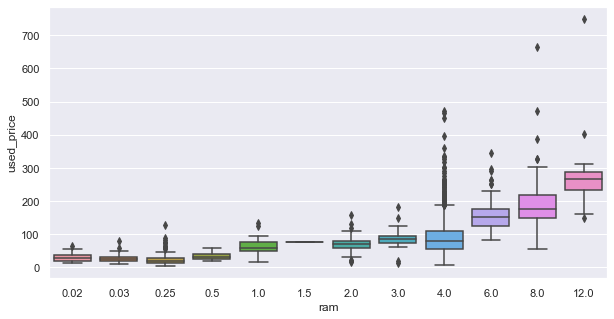

<IPython.core.display.Javascript object>

In [177]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="ram", y="used_price", data=df1)
plt.show()

In [178]:
# Observations
# The price of used devices tend to increase with increase in the size
# of the ram.

<IPython.core.display.Javascript object>

In [179]:
# brand_name vs used_price vs os

<IPython.core.display.Javascript object>

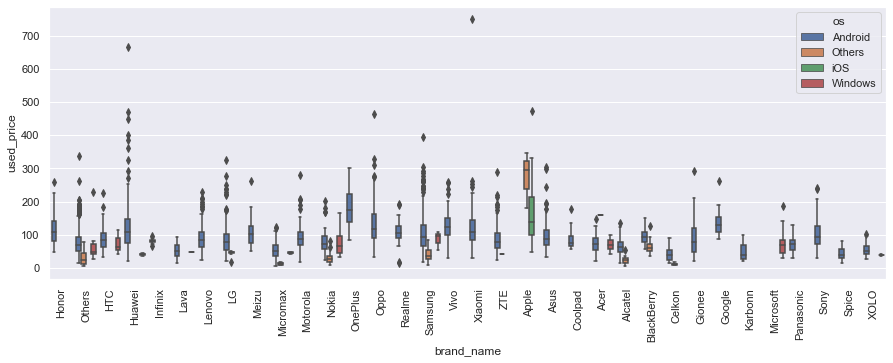

<IPython.core.display.Javascript object>

In [180]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="brand_name", y="used_price", hue="os", data=df1)
plt.xticks(rotation=90)
plt.show()

In [181]:
# Observations
# The Apple brand (used devices) with the iOS operating system are more
# expensive.

<IPython.core.display.Javascript object>

In [182]:
# os vs used_price vs ram

<IPython.core.display.Javascript object>

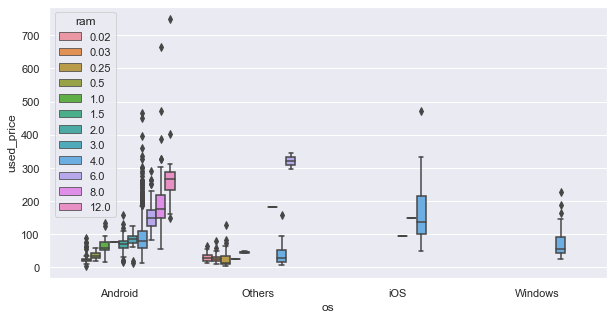

<IPython.core.display.Javascript object>

In [183]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="os", y="used_price", hue="ram", data=df1)
plt.show()

In [184]:
# Observations
# Android has the most expensive used devices with bigger ram size

<IPython.core.display.Javascript object>

In [185]:
# os vs days_used

<IPython.core.display.Javascript object>

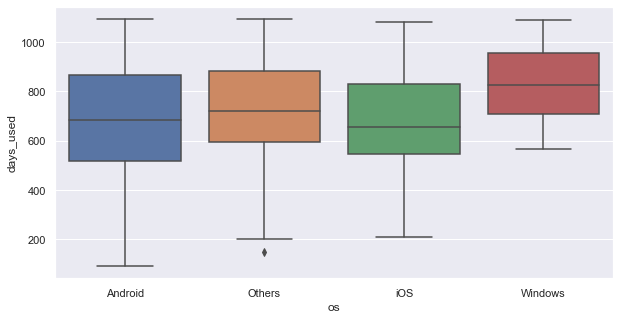

<IPython.core.display.Javascript object>

In [186]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="os", y="days_used", data=df1)
plt.show()

In [347]:
# Observations
# .The windows operating sy.The windows operating system are used for longer period of time 
#(median > 800 days) as comapared to Android, Others, iOS.

<IPython.core.display.Javascript object>

In [193]:
##Summary of EDA

<IPython.core.display.Javascript object>

In [189]:
# Data Description

<IPython.core.display.Javascript object>

In [191]:
# .The target variable (used_price) is of float type.
# .Columns like brand_name, os, 4g, 5g are of object type.
# .All other columns are numeric in nature.
# .There are no duplicate values in the data.
# .There are missing values in the data.

<IPython.core.display.Javascript object>

In [192]:
# Data Cleaning:

<IPython.core.display.Javascript object>

In [194]:
# Missing values in the main_camera_mp, selfie_camera_mp, int_memory,
# ram, battery and weight columns were imputed using their repective
# column medians.

<IPython.core.display.Javascript object>

In [195]:
# Observations from EDA:

<IPython.core.display.Javascript object>

In [349]:
# .used_price: The used device price distribution is right skewed with
# some potential outlier. Majority of the data falls below 200 euros. It
# has a mean value of ~92.3 euros and and the price ranges from 4.65 to
# 749.52 euros. The used device price increases with increase in the ram
# size.
# . 93.1% of the used device market is dominated by Android devices.
# .Tablets and phones offering large batteries of more than 4500 mAh are
# mostly seen with the weight of 195.0g followed by 199.0g, 185.0g etc
# .Samsung and Huawei provide the highest number of phones with size
# larger than 6 inches while Google and Infinix provide the least.
# .new_price  and selfie_camera_mp are highly positively correlated
# with used_price and used_price respectively.
# .selfie_camera_mp - The distribution is right skewed with some potential
# outliers.
# .int_memory distribution is right skewed with some outiers
# .The battery distribution is also right skewed with some potential
# outlier
# The weight distribution is highly right skewed with some ooutliers.
# Most of the data concentrated between 100 and 200g.
# . The release_year distribution is slightly right skewed and the
# price for used device has been increasing from 2013 till 2020.
# .Used device price with 5g are more expensive (median value of
# ~185 euros) than those without 5g.
# .The windows operating sy.The windows operating system are used for longer period of time
# (median > 800 days) as comapared to Android, Others, iOS.

<IPython.core.display.Javascript object>

In [196]:
# Variable Transformations

<IPython.core.display.Javascript object>

In [197]:
# Let us check the numeric columns other than the tag columns for
# skewness.

<IPython.core.display.Javascript object>

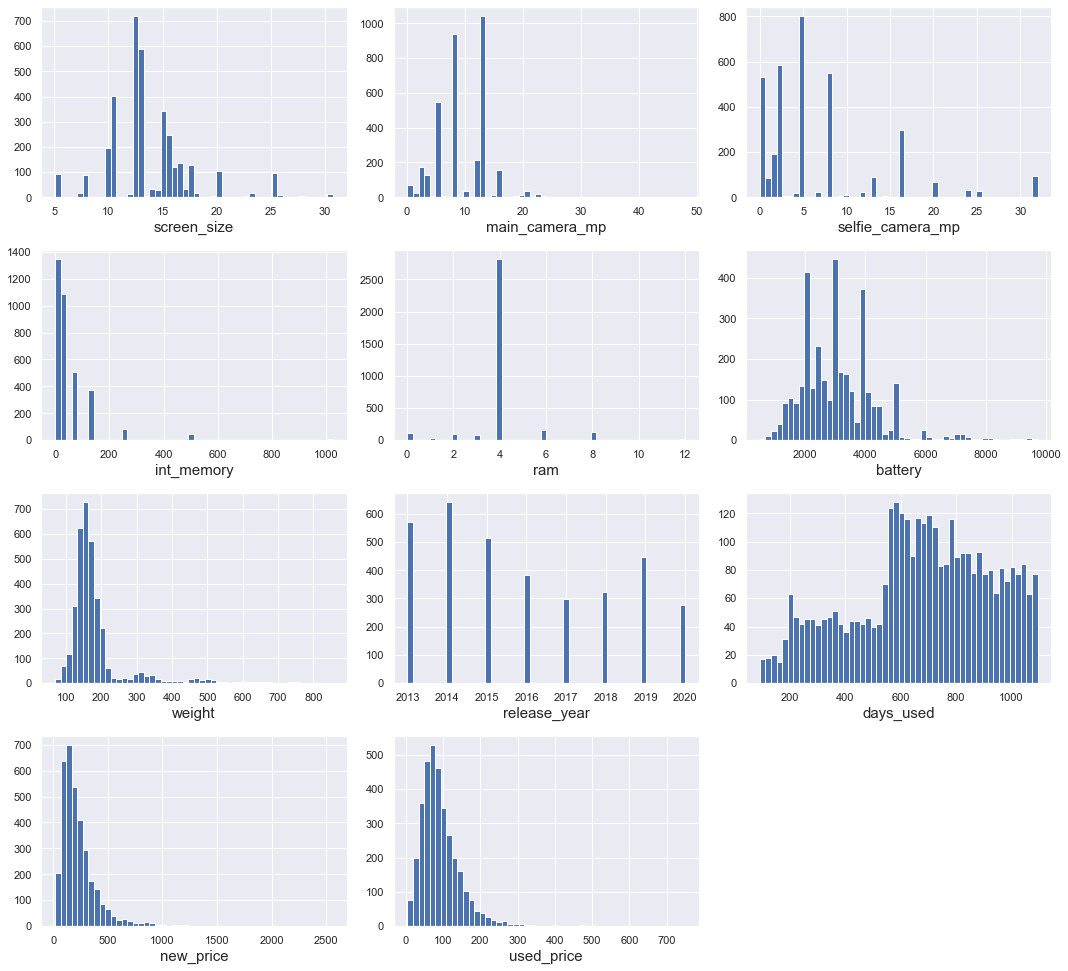

<IPython.core.display.Javascript object>

In [198]:
# creating a list of columns
dist_cols = [item for item in df1.select_dtypes(include=np.number).columns]

# let's plot a histogram of all numeric columns

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

In [202]:
# .Most of the columns have a very skewed distribution.
# .We will apply the log transformation to all the numeric column except
# days_used, release_year and ram (as it will not improve the skewness
# in this variables) to deal with skewness in the data.

<IPython.core.display.Javascript object>

In [201]:
dist_cols.remove("release_year")

<IPython.core.display.Javascript object>

In [203]:
dist_cols.remove("days_used")

<IPython.core.display.Javascript object>

In [204]:
# dropping the rating column as it is almost normally distributed
dist_cols.remove("ram")

# applying log transform
for col in dist_cols:
    df1[col + "_log"] = np.log(df1[col] + 1)

# dropping the original columns
df1.drop(dist_cols, axis=1, inplace=True)
df1.head()

,brand_name,os,4g,5g,ram,release_year,days_used,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,new_price_log,used_price_log
0,Honor,Android,yes,no,3.0,2020,127,2.740840,2.639057,1.791759,4.174387,8.013343,4.990433,4.724019,4.320949
1,Honor,Android,yes,yes,8.0,2020,325,2.906901,2.639057,2.833213,4.859812,8.366603,5.365976,5.523020,5.167810
2,Honor,Android,yes,yes,8.0,2020,162,2.873000,2.639057,2.197225,4.859812,8.343078,5.365976,5.887409,5.117095
3,Honor,Android,yes,yes,6.0,2020,345,3.277145,2.639057,2.197225,4.174387,8.888895,6.175867,5.634540,5.141254
4,Honor,Android,yes,no,3.0,2020,293,2.792391,2.639057,2.197225,4.174387,8.517393,5.225747,4.954911,4.402319


<IPython.core.display.Javascript object>

In [205]:
# Let's check for skewness after applying the log transformation.

<IPython.core.display.Javascript object>

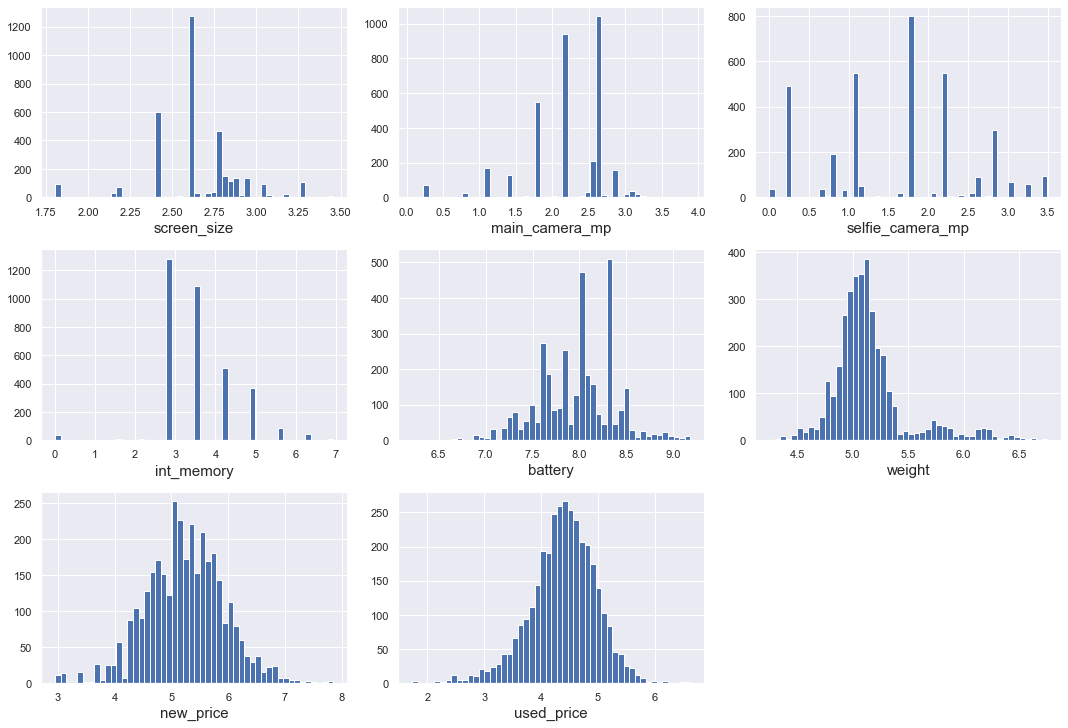

<IPython.core.display.Javascript object>

In [207]:
new_dist_cols = [item + "_log" for item in dist_cols]

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df1[new_dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

In [208]:
# Observation:
#  The columns are still skewed, but not as heavily as before.

<IPython.core.display.Javascript object>

In [210]:
# adding ram, release_year, days_used for checking correlation
new_dist_cols.append("ram")

<IPython.core.display.Javascript object>

In [211]:
new_dist_cols.append("release_year")

<IPython.core.display.Javascript object>

In [212]:
new_dist_cols.append("days_used")

<IPython.core.display.Javascript object>

In [209]:
# Let's check for correlations between the columns

<IPython.core.display.Javascript object>

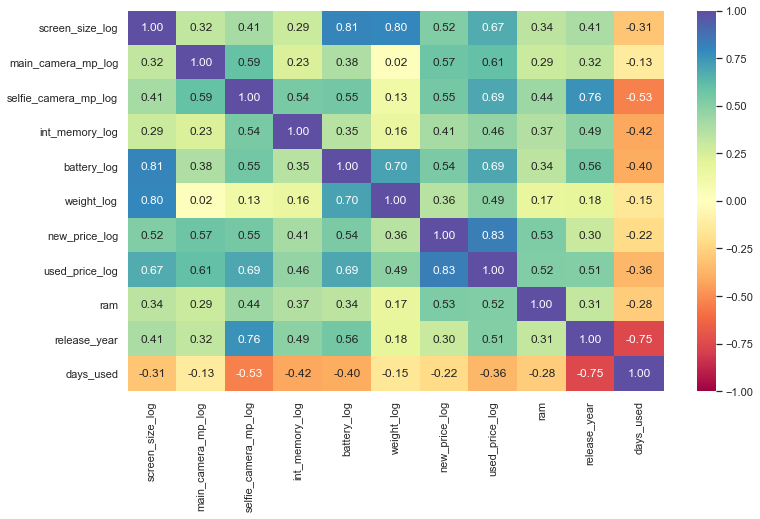

<IPython.core.display.Javascript object>

In [213]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[new_dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [216]:
# Observations:
# *There are many very highly correlated columns including:
# -screen_size_log and weight_log, screen_size_log and used_price_log,
# main_camera_mp_log and used_price_log, selfie_camera_mp_log and
# used_price_log, selfie_camera_mp_log and release_year,
# battery_log and screen_size_log, battery_log and weight_log,
# new_price_log and used_price_log, used_price_log and screen_size_log,
# used_price_log and main_camera_mp_log, used_price_log and
# selfie_camera_mp_log, release_year and days_used

<IPython.core.display.Javascript object>

In [217]:
# Outlier Detection

<IPython.core.display.Javascript object>

In [218]:
# Let's plot the boxplots of all columns to check for outliers.

<IPython.core.display.Javascript object>

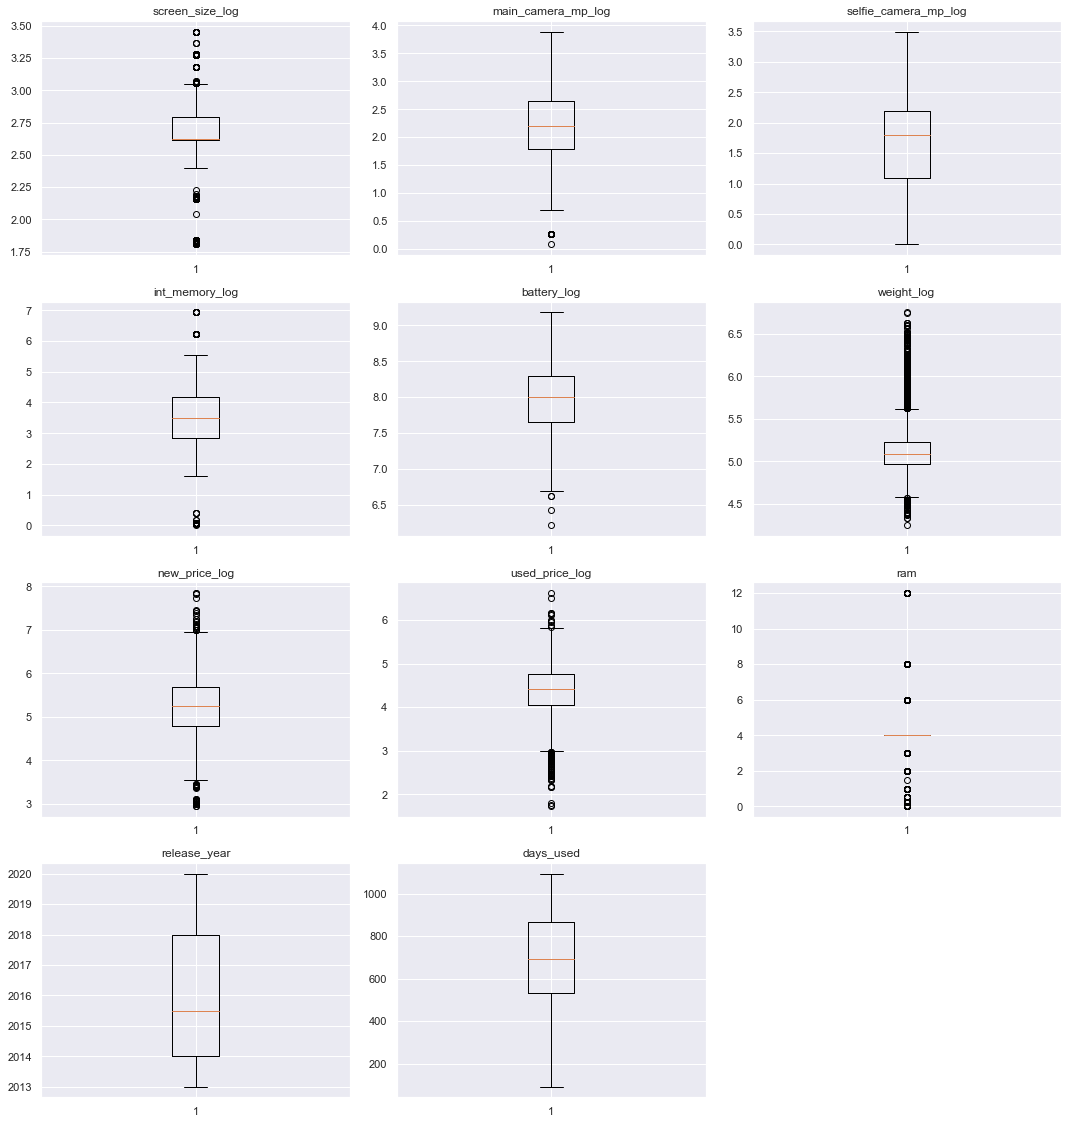

<IPython.core.display.Javascript object>

In [219]:
# creating a list of columns
out_cols = [item for item in df1.select_dtypes(include=np.number).columns]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(new_dist_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [220]:
# Some of the columns do have outliers in them.
# .We will treat these outliers by flooring and capping, i.e., we will
# replace the

# *lower outliers by Q1 - 1.5IQR.
# *upper outliers by Q3 + 1.5IQR.

# NB: We will not treat outliers in the ram column as doing so will
# remove the variation in the column and most likely make it a constant,
# which is not desirable.

<IPython.core.display.Javascript object>

In [221]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # .all the values smaller than Lower_Whisker will be assigned the
    # value of Lower_Whisker
    # .all the values greater than Upper_Whisker will be assigned the
    # value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [222]:
treat_out_cols = [
    "screen_size_log",
    "main_camera_mp_log",
    "int_memory_log",
    "battery_log",
    "weight_log",
    "new_price_log",
    "used_price_log",
]

df2 = treat_outliers_all(df1, treat_out_cols)

<IPython.core.display.Javascript object>

In [223]:
# Let's recheck the boxplots to see if outliers were treated.

<IPython.core.display.Javascript object>

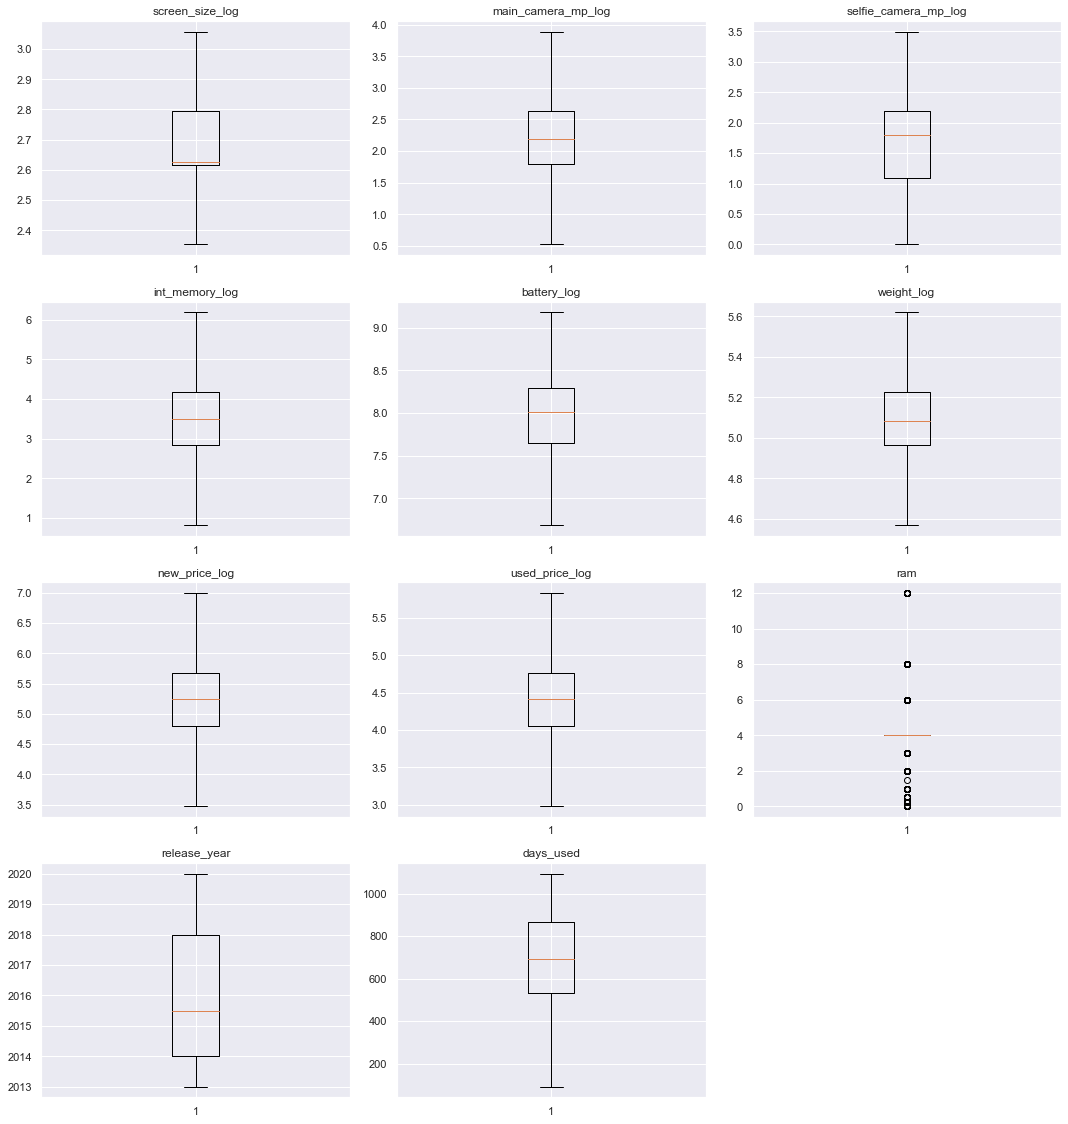

<IPython.core.display.Javascript object>

In [224]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(new_dist_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [226]:
# Observations:
# Outliers were treated.

<IPython.core.display.Javascript object>

In [227]:
# Model Building

<IPython.core.display.Javascript object>

In [228]:
# define dependent variable
X = df2.drop(["used_price_log"], axis=1)
y = df2["used_price_log"]

<IPython.core.display.Javascript object>

In [229]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [230]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,ram,release_year,days_used,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,new_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,3.0,2020.0,127.0,2.740840,2.639057,1.791759,4.174387,8.013343,4.990433,4.724019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,8.0,2020.0,325.0,2.906901,2.639057,2.833213,4.859812,8.366603,5.365976,5.523020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,8.0,2020.0,162.0,2.873000,2.639057,2.197225,4.859812,8.343078,5.365976,5.887409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,6.0,2020.0,345.0,3.057946,2.639057,2.197225,4.174387,8.888895,5.620100,5.634540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,3.0,2020.0,293.0,2.792391,2.639057,2.197225,4.174387,8.517393,5.225747,4.954911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [231]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [232]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [233]:
# fitting a linear model
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     266.4
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:17:51   Log-Likelihood:                 254.36
No. Observations:                2417   AIC:                            -410.7
Df Residuals:                    2368   BIC:                            -127.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.59

<IPython.core.display.Javascript object>

In [234]:
# Interpretation of R-squared
# The R-squared value tells us that our model can explain 84.3% of the
# variance in the training set.

<IPython.core.display.Javascript object>

In [235]:
# Interpretation of Coefficients

<IPython.core.display.Javascript object>

In [236]:
# .The coefficients tell us how one unit change in X can affect y.
# .The sign of the coefficient indicates if the relationship is positive
# or negative.
# .In this data ser, for example, an increase of 1 release_year occurs
# with a 0.006 decrease in used_price_log, and a unit increase in ram
# occurs with a 0.010 increase in the used_price_log.

<IPython.core.display.Javascript object>

In [238]:
# Interpretation of p-values (P > |t|)
# .For each predictor variable there is a null hypothesis and alternate
# hypothesis.

# - Null hypothesis : Predictor variable is not significant
# - Alternate hypothesis : Predictor variable is significant

# .(P > |t|) gives the p-value for each predictor variable to check the
# null hypothesis.
# .If the level of significance is set to 5% (0.05), the p-values
# greater than 0.05 would indicate that the corresponding predictor
# variables are not significant.
# .We need to ensure that there is no multicollinearity in order to
# interpret the p-values.
# .When we have multicollinearity in the linear model, the coefficients
# that the model suggests are unreliable.

<IPython.core.display.Javascript object>

In [239]:
# Model performance check

<IPython.core.display.Javascript object>

In [240]:
# .We will be using metric functions defined in sklearn for RMSE, MAE,
# and  R - squared
# .We will define functions to calculate adjusted  𝑅 - squared,
# R - squared and MAPE.
# .The mean absolute percentage error (MAPE) measures the accuracy of
# predictions as a percentage, and can be calculated as the average
# absolute percent error for each predicted value minus actual values
# divided by actual values. It works best if there are no extreme values
# in the data and none of the actual values are 0.
# .We will create a function that will print out all the above metrics
# in one go.

<IPython.core.display.Javascript object>

In [241]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [242]:
# Model performance evaluation

<IPython.core.display.Javascript object>

In [243]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2178,0.171509,0.843751,0.840516,4.004043


<IPython.core.display.Javascript object>

In [244]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221845,0.176045,0.845399,0.837723,4.107306


<IPython.core.display.Javascript object>

In [245]:
# Observations
# .The train and test  𝑅 - squared are 0.84 and 0.84 indicating that the
# model explains 84% and 84% of the total variation in the train and
# test sets respectively. Also, both scores are comparable.
# .RMSE values on the train and test sets are also comparable.
# .MAE indicates that our current model is able to predict used_price
# within a mean error of 0.17 on the test set.
# .MAPE of 4.11 on the test data means that we are able to predict within
# 4% of the used_price.

<IPython.core.display.Javascript object>

In [246]:
# Checking Linear Regression Assumptions

<IPython.core.display.Javascript object>

In [247]:
# In order to make statistical inferences from a linear regression model,
# it is important to ensure that the assumptions of linear regression
# are satisfied.

<IPython.core.display.Javascript object>

In [248]:
# We will be checking the following Linear Regression assumptions:

# 1.No Multicollinearity

# 2.Linearity of variables

# 3.Independence of error terms

# 4.Normality of error terms

# 5.No Heteroscedasticity

<IPython.core.display.Javascript object>

In [249]:
# TEST FOR MULTICOLLINEARITY

<IPython.core.display.Javascript object>

In [256]:
# .Multicollinearity  occurs when the predictor variables in a regression
# model are correlated. This might cause a problem when fitting a model
# and interpreting the results. The presence of multicollinearity in a
# linear model renders the cofficient to be unreliable.

# .We will test for multicollinearity using Variance Inflation factor
# (VIF).

# .VIF: Variance inflation factors measure the inflation in the variances
# of the regression coefficients estimates due to collinearities that
# exist among the predictors.

# .General Rule of thumb:

# .If VIF is 1 then there is no correlation between the kth predictor
# and the remaining predictor variables.
# .If VIF exceeds 5 or is close to exceeding 5, we say there is moderate
# multicollinearity.
# .If VIF is 10 or exceeding 10, it shows signs of high
# multicollinearity.

<IPython.core.display.Javascript object>

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [252]:
checking_vif(X_train)

,feature,VIF
0,const,4.368409e+06
1,ram,2.182803e+00
2,release_year,5.674413e+00
3,days_used,2.661374e+00
4,screen_size_log,5.317498e+00
5,main_camera_mp_log,2.873029e+00
6,selfie_camera_mp_log,4.801633e+00
7,int_memory_log,2.107267e+00
8,battery_log,4.683577e+00
9,weight_log,4.660356e+00


<IPython.core.display.Javascript object>

In [258]:
# Observations:
# . The VIF values indicate that the features release_year, screen_size_log,
# brand_name_Apple, brand_name_Samsung, brand_name_Others, os_iOS are
# correlated as theyr are greater than 5 with one or more independent
# features.

# .Multicollinearity affects only the specific independent variables
# that are correlated. Therefore, in this case, we can trust the p-values
# of the other variables.

# .To treat multicollinearity, we will have to drop one or more of the
# correlated features (release_year, screen_size_log, brand_name_Apple,
# brand_name_Samsung, brand_name_Others, os_iOS).

# .We will drop the variable that has the least impact on the adjusted
# R-squared and RMSE of the model, drop the varibale that makes least
#change in adjusted R-squared, check the VIF scores again, we will
#continue till all VIF scores are under 5.


<IPython.core.display.Javascript object>

In [259]:
# Let's define a function that will help us do this.

<IPython.core.display.Javascript object>

In [254]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [255]:
col_list = ["brand_name_Apple", "os_iOS"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.840560,0.220058
1,brand_name_Apple,0.840535,0.220075


<IPython.core.display.Javascript object>

In [260]:
# There is a very minimal effect on the R-squared after dropping either
# of the variables. We proceed in dropping brand_name_Apple from the
# both the train and test data.

<IPython.core.display.Javascript object>

In [270]:
col_to_drop = "brand_name_Apple"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,4.341868e+06
1,ram,2.176730e+00
2,release_year,5.640642e+00
3,days_used,2.660629e+00
4,screen_size_log,5.315826e+00
5,main_camera_mp_log,2.859252e+00
6,selfie_camera_mp_log,4.739257e+00
7,int_memory_log,2.107263e+00
8,battery_log,4.670607e+00
9,weight_log,4.659212e+00


<IPython.core.display.Javascript object>

In [263]:
col_list2 = ["brand_name_Others", "brand_name_Samsung"]

res2 = treating_multicollinearity(X_train, y_train, col_list2)
res2

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.840651,0.219996
1,brand_name_Samsung,0.840650,0.219996


<IPython.core.display.Javascript object>

In [277]:
# Since there is a very small effect on adj. R-squared after dropping
# the 'brand_name_Samsung' column, we can remove it from the training
# and test set.

<IPython.core.display.Javascript object>

In [273]:
col_to_drop = "brand_name_Others"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,4.341751e+06
1,ram,2.172398e+00
2,release_year,5.640637e+00
3,days_used,2.660385e+00
4,screen_size_log,5.288231e+00
5,main_camera_mp_log,2.858681e+00
6,selfie_camera_mp_log,4.734698e+00
7,int_memory_log,2.107006e+00
8,battery_log,4.665518e+00
9,weight_log,4.642540e+00


<IPython.core.display.Javascript object>

In [266]:
col_list3 = ["release_year", "screen_size_log"]

res3 = treating_multicollinearity(X_train3, y_train, col_list3)
res3

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.840688,0.219970
1,screen_size_log,0.834235,0.224381


<IPython.core.display.Javascript object>

In [276]:
# Since there is a very small effect on adj. R-squared after dropping
# the 'release_year' column, we can remove it from the training
# and test set.

<IPython.core.display.Javascript object>

In [274]:
col_to_drop = "release_year"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,899.448107
1,ram,2.170910
2,days_used,1.926305
3,screen_size_log,5.240059
4,main_camera_mp_log,2.858270
5,selfie_camera_mp_log,3.881367
6,int_memory_log,2.020732
7,battery_log,4.601009
8,weight_log,4.639898
9,new_price_log,2.997551


<IPython.core.display.Javascript object>

In [ ]:
col_list4 = ["screen_size_log"]

res4 = treating_multicollinearity(X_train4, y_train, col_list4)
res4

In [275]:
# Since there is a very small effect on adj. R-squared after dropping
# the screen_size_log column, we can remove it from both the training
# and test set.

<IPython.core.display.Javascript object>

In [278]:
col_to_drop = "screen_size_log"
X_train5 = X_train4.loc[:, ~X_train4.columns.str.startswith(col_to_drop)]
X_test5 = X_test4.loc[:, ~X_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size_log


,feature,VIF
0,const,808.010040
1,ram,2.165626
2,days_used,1.894867
3,main_camera_mp_log,2.852459
4,selfie_camera_mp_log,3.807764
5,int_memory_log,2.017599
6,battery_log,4.040112
7,weight_log,3.017180
8,new_price_log,2.991161
9,brand_name_Alcatel,1.210671


<IPython.core.display.Javascript object>

In [279]:
# Observation
# None of the variables show moderate or high multicollinearity.

<IPython.core.display.Javascript object>

In [280]:
# Dropping high p-value variables

<IPython.core.display.Javascript object>

In [281]:
# .We will drop the predictor variables having a p-value greater than
# 0.05 as they do not significantly impact the target variable.
# .But sometimes p-values change after dropping a variable. So, we'll not
# drop all variables at once.
# .Instead, we will do the following:
# .Build a model, check the p-values of the variables, and drop the
# column with the highest p-value.
# .Create a new model without the dropped feature, check the p-values of
# the variables, and drop the column with the highest p-value.
# .Repeat the above two steps till there are no columns with
# p-value > 0.05.

# The above process can also be done manually by picking one variable at
# a time that has a high p-value, dropping it, and building a model
# again. But that might be a little tedious and using a loop will be
# more efficient.

<IPython.core.display.Javascript object>

In [282]:
# initial list of columns
cols = X_train5.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train5[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log', 'int_memory_log', 'battery_log', 'weight_log', 'new_price_log', 'brand_name_Alcatel', 'brand_name_BlackBerry', 'brand_name_Karbonn', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others']


<IPython.core.display.Javascript object>

In [283]:
X_train6 = X_train5[selected_features]
X_test6 = X_test5[selected_features]

<IPython.core.display.Javascript object>

In [316]:
olsmodel2 = sm.OLS(y_train, X_train6).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     939.3
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:37   Log-Likelihood:                 192.70
No. Observations:                2417   AIC:                            -357.4
Df Residuals:                    2403   BIC:                            -276.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.91

<IPython.core.display.Javascript object>

In [285]:
# Observations

<IPython.core.display.Javascript object>

In [286]:
# .Dropping the high p-value predictor variables has not adversely
# affected the model performance.
# .This shows that these variables do not significantly impact the
# target variable.

<IPython.core.display.Javascript object>

In [287]:
# TEST FOR LINEARITY AND INDEPENDENCE

<IPython.core.display.Javascript object>

In [288]:
# .We will test for linearity and independence by making a plot of
# fitted values vs residuals and checking for patterns.
# .If there is no pattern, then we say the model is linear and residuals
# are independent.
# .Otherwise, the model is showing signs of non-linearity and residuals
# are not independent.

<IPython.core.display.Javascript object>

In [289]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.104130,3.778247,0.325882
1525,4.460029,4.736136,-0.276107
1128,4.328626,4.402961,-0.074335
3003,4.295788,4.343447,-0.047659
2907,4.467975,4.478796,-0.010821


<IPython.core.display.Javascript object>

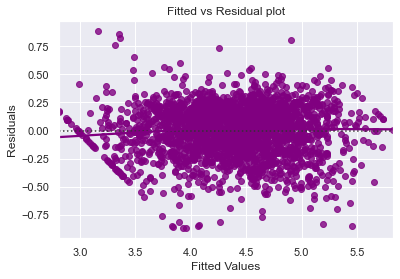

<IPython.core.display.Javascript object>

In [290]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [291]:
# Observations

<IPython.core.display.Javascript object>

In [292]:
# .We see no pattern in the plot above.
# .Hence, the assumptions of linearity and independence are satisfied.

<IPython.core.display.Javascript object>

In [293]:
# TEST FOR NORMALITY

<IPython.core.display.Javascript object>

In [294]:
# .We will test for normality by checking the distribution of residuals,
# by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk
# test.
# .If the residuals follow a normal distribution, they will make a
# straight line plot, otherwise not.
# .If the p-value of the Shapiro-Wilk test is greater than 0.05, we can
# say the residuals are normally distributed.

<IPython.core.display.Javascript object>

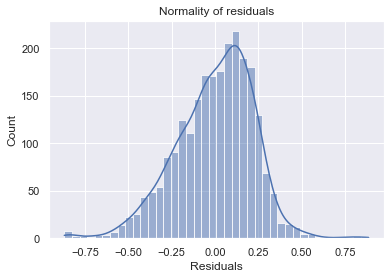

<IPython.core.display.Javascript object>

In [295]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

In [296]:
# Observations
# .The histogram of residuals almost has a bell shape structure.
# .Let's check the Q-Q plot.

<IPython.core.display.Javascript object>

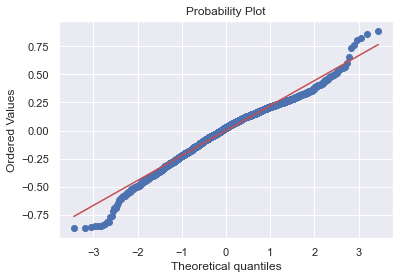

<IPython.core.display.Javascript object>

In [297]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [298]:
# .The residuals almost follow a straight line.
# .Let's check the results of the Shapiro-Wilk test.

# The null and alternate hypotheses of the test are as follows:
# Null hypothesis - Data is normally distributed.
# Alternate hypothesis - Data is not normally distributed.

<IPython.core.display.Javascript object>

In [299]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9810009598731995, pvalue=1.9044589524392182e-17)

<IPython.core.display.Javascript object>

In [300]:
# Observations
# .Since p-value < 0.05, the residuals are not normal as per the
# Shapiro-Wilk test.
# .However, based on the distribution plot and Q-Q plot, we can consider
# the distribution to be a good approximation of the normal distribution.
# .So, the assumption is satisfied.

<IPython.core.display.Javascript object>

In [301]:
# TEST FOR HOMOSCEDASTICITY

<IPython.core.display.Javascript object>

In [302]:
# .We will test for homoscedasticity by using the goldfeldquandt test.
# .If we get a p-value greater than 0.05, we can say that the residuals
# are homoscedastic. Otherwise, they are heteroscedastic.

# The null and alternate hypotheses of the goldfeldquandt test are as
# follows:
# Null hypothesis : Residuals are homoscedastic
# Alternate hypothesis : Residuals have hetroscedasticity

<IPython.core.display.Javascript object>

In [303]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train6)
lzip(name, test)

[('F statistic', 1.1136320718489976), ('p-value', 0.031509429748363946)]

<IPython.core.display.Javascript object>

In [304]:
# Observation:
# As the p-value < 0.05, we reject the null hypothesis. Therefore, the
# .residuals have heteroscedasticity.

<IPython.core.display.Javascript object>

In [306]:
# .Considering the fact that some of the variables (mostly numeric),
# were already treated with log transformation and for outliers, it will
# be imperative to use a robust regression technique so as to address
# the heteroscedasticity observed in the variables. In order to account
# for the heteroscedasticity in the data, a heteroscedasticity consistent
# covariance matrix (HCCM) is selected and passed in the argument
# "cov_type=" as part of the .fit() method.

<IPython.core.display.Javascript object>

In [318]:
olsmodel3 = sm.OLS(y_train, X_train6)
olsres3 = olsmodel3.fit(cov_type="HC3")
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     839.4
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:51:47   Log-Likelihood:                 192.70
No. Observations:                2417   AIC:                            -357.4
Df Residuals:                    2403   BIC:                            -276.3
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.91

<IPython.core.display.Javascript object>

In [350]:
# Observations
# There are mark differences in the models and their respective results.
# Accounting for heteroscedasticity using the robust regression technique
# has modified the F-statistics, the standard errors, the coeficient etc.
# The olsmodel3 is a better model than olsmodel2.

<IPython.core.display.Javascript object>

In [320]:
# Predictions

<IPython.core.display.Javascript object>

In [321]:
# Let's print the linear regression equation.

<IPython.core.display.Javascript object>

In [324]:
# let's check the model parameters
olsres3.params

const                   -1.916843
ram                      0.018938
main_camera_mp_log       0.155184
selfie_camera_mp_log     0.135748
int_memory_log           0.037730
battery_log              0.094296
weight_log               0.543030
new_price_log            0.379805
brand_name_Alcatel       0.053439
brand_name_BlackBerry   -0.188007
brand_name_Karbonn       0.127414
brand_name_Nokia         0.132269
brand_name_Xiaomi        0.050684
os_Others                0.101496
dtype: float64

<IPython.core.display.Javascript object>

In [328]:
# Let us write the equation of linear regression
Equation = "used_price_log ="
print(Equation, end=" ")
for i in range(len(X_train6.columns)):
    if i == 0:
        print(olsres3.params[i], "+", end=" ")
    elif i != len(X_train6.columns) - 1:
        print(
            olsres3.params[i], "* (", X_train6.columns[i], ")", "+", end="  ",
        )
    else:
        print(olsres3.params[i], "* (", X_train6.columns[i], ")")

used_price_log = -1.9168430392523512 + 0.018938210471097422 * ( ram ) +  0.15518350636829809 * ( main_camera_mp_log ) +  0.1357475519009551 * ( selfie_camera_mp_log ) +  0.037729783801735 * ( int_memory_log ) +  0.09429569556937054 * ( battery_log ) +  0.5430300266984885 * ( weight_log ) +  0.37980457382539945 * ( new_price_log ) +  0.053438926562542705 * ( brand_name_Alcatel ) +  -0.1880073792855138 * ( brand_name_BlackBerry ) +  0.1274135027347102 * ( brand_name_Karbonn ) +  0.1322693927476648 * ( brand_name_Nokia ) +  0.05068448480152718 * ( brand_name_Xiaomi ) +  0.10149610644712073 * ( os_Others )


<IPython.core.display.Javascript object>

In [329]:
# We can now use the model for making predictions on the test data.

<IPython.core.display.Javascript object>

In [330]:
X_train6.columns


Index(['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log',
       'int_memory_log', 'battery_log', 'weight_log', 'new_price_log',
       'brand_name_Alcatel', 'brand_name_BlackBerry', 'brand_name_Karbonn',
       'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others'],
      dtype='object')

<IPython.core.display.Javascript object>

In [331]:
X_test6.columns

Index(['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log',
       'int_memory_log', 'battery_log', 'weight_log', 'new_price_log',
       'brand_name_Alcatel', 'brand_name_BlackBerry', 'brand_name_Karbonn',
       'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others'],
      dtype='object')

<IPython.core.display.Javascript object>

In [332]:
# let's make predictions on the test set
y_pred = olsres3.predict(X_test6)

<IPython.core.display.Javascript object>

In [333]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.22342786765472256

<IPython.core.display.Javascript object>

In [334]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.22667062153180967

<IPython.core.display.Javascript object>

In [337]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.17661305903245753

<IPython.core.display.Javascript object>

In [338]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18015070574389405

<IPython.core.display.Javascript object>

In [351]:
# Actionable Insights and Recommendations

<IPython.core.display.Javascript object>

In [355]:
# .We can see that RMSE on the train and test sets are comparable. So,
# our model is not suffering from overfitting.
# .MAE indicates that our current model is able to predict used_price
# within a mean error of 0.18 units on the test data.
# The R-squared of the model is 0.836 and adjusted R-squared is 0.835,
# which shows that the model is able to explain ~84% variance in the
# data. This is quite good and they are comparable.
# .Hence, we can conclude the model "olsres3" is good for prediction as
# well as inference purposes.

<IPython.core.display.Javascript object>